In [1]:
# loading data and importing lbraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
Churn_prediction = pd.read_csv('churn.csv')

In [3]:
# displaying the first 5 rows
Churn_prediction.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# To get information on the dataset
Churn_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# display the number of null values in each columns
Churn_prediction.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
Churn_prediction.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Dropping the columns which are not required for the final prediction
Churn_prediction.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
# Verify the remaining columns
print(Churn_prediction.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


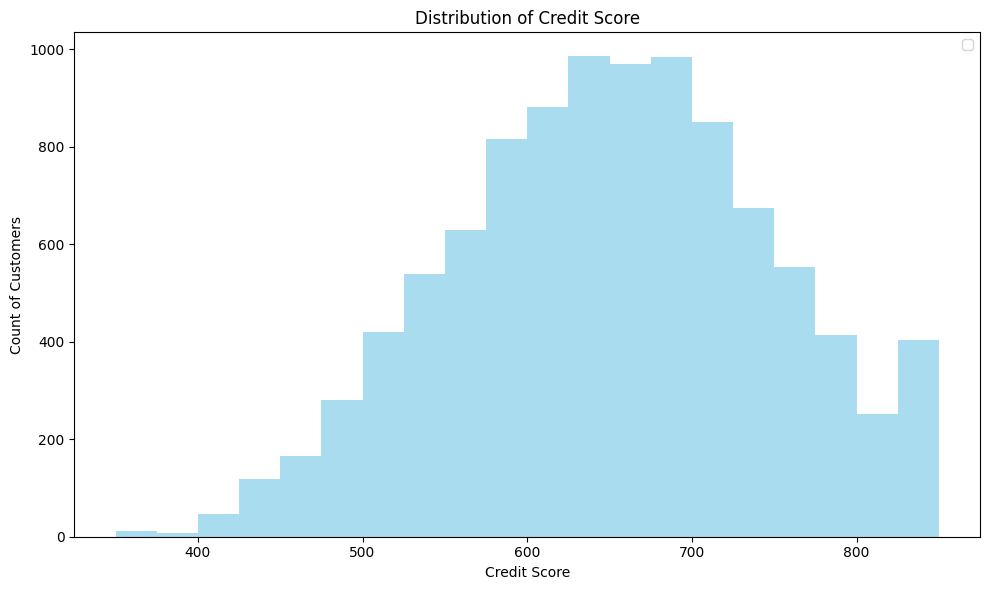

In [8]:
# variation of number of customers based on their credit score
plt.figure(figsize=(10, 6))
plt.hist(Churn_prediction['CreditScore'], bins=20, color='skyblue', alpha=0.7)

plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count of Customers')
plt.legend()
plt.tight_layout()
plt.show()

There are more customers with the credit score between 600 and 700.

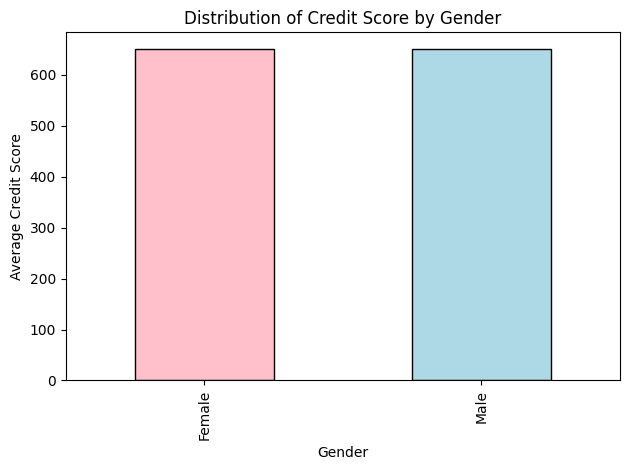

In [9]:
#variation of number of male and female customers based on their credit score
credit_score_by_gender = Churn_prediction.groupby('Gender')['CreditScore'].mean()
credit_score_by_gender.plot(kind='bar', color=['pink', 'lightblue'], edgecolor='black')
plt.title('Distribution of Credit Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Credit Score')

plt.tight_layout()
plt.show()


From the plot it is clear that male and female customers credit score mean is almost same.

In [10]:
#mean of number of male and female customers based on their credit score
credit_score_by_gender = Churn_prediction.groupby('Gender')['CreditScore'].mean()
print("The mean Credit Score:")
print(credit_score_by_gender)

The mean Credit Score:
Gender
Female    650.831389
Male      650.276892
Name: CreditScore, dtype: float64


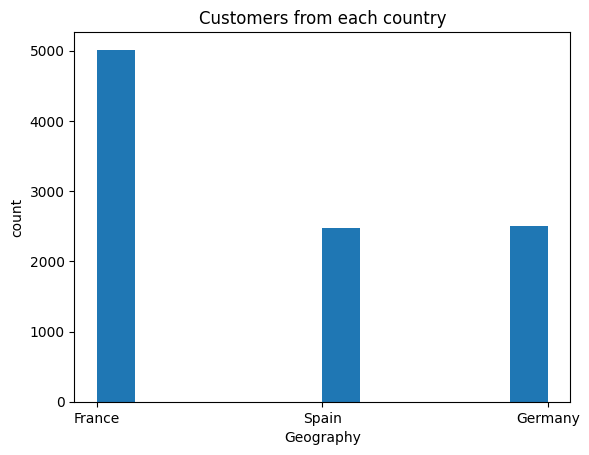

In [12]:
#plot for number of customers from each country
plt.hist(Churn_prediction['Geography'], bins=12)
plt.xlabel('Geography')
plt.ylabel('count')
plt.title('Customers from each country')
plt.show()

The major customers for the bank is from France.

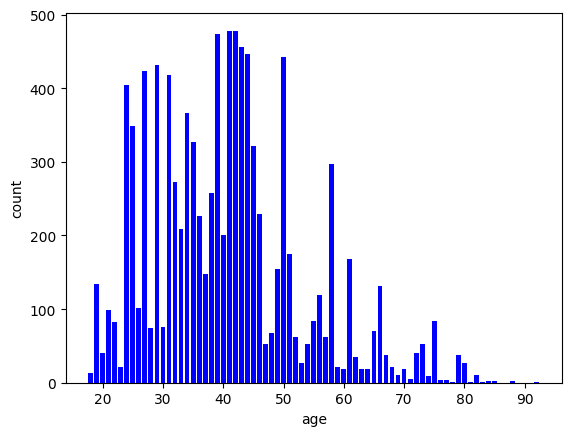

In [13]:
#plotting bar graph to show variation of age of customers
plt.bar(Churn_prediction.Age.unique(), Churn_prediction.Age.value_counts(), color = "blue")
plt.xlabel("age")
plt.ylabel("count")
plt.show()

Most customers of the bank fall in the age range of 40 to 50.

In [14]:
# encoding the columns to convert categorical columns to numerical values
Churn_prediction["Geography"] = Churn_prediction["Geography"].map({"France":0, "Spain":1, "Germany":2})
Churn_prediction["Gender"] = Churn_prediction["Gender"].map({"Female":0, "Male":1})


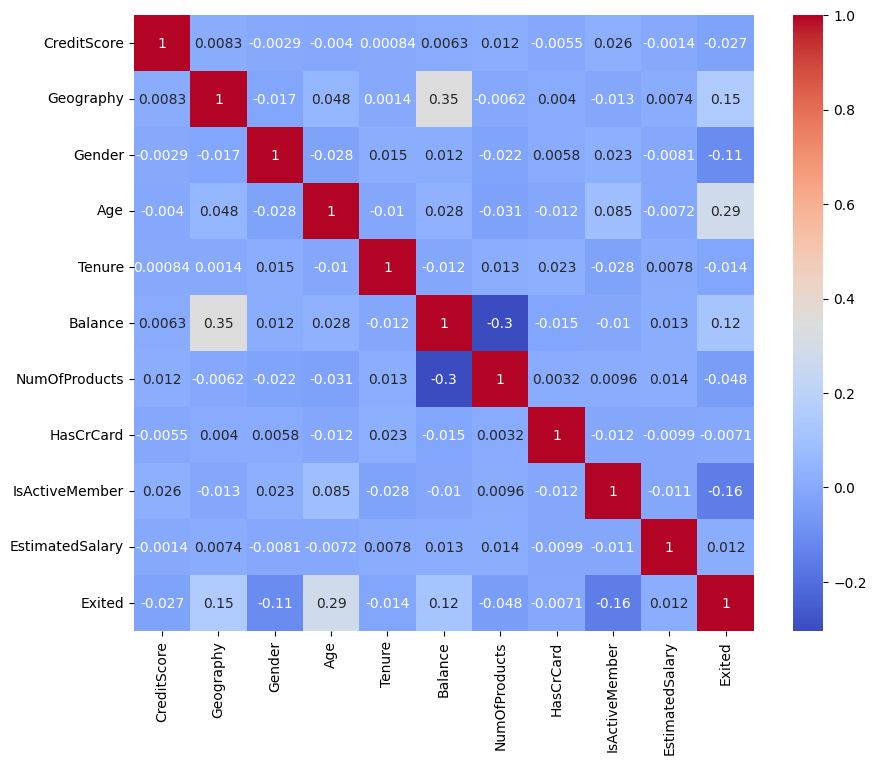

In [15]:
# plotting the correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(Churn_prediction.corr(), annot=True, cmap='coolwarm')
plt.show()


The correlation map shows how customer churn is related to other factors.
The Churn is positively correlated with Geography, Age, Balance and Estimatedsalary.
It is negatively correlated with CreditScore, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember.

In [16]:
# performing feature scaling
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                      'EstimatedSalary', 'HasCrCard', 'IsActiveMember']
Churn_prediction[numerical_features] = scaler.fit_transform(Churn_prediction[numerical_features])

# defining feature (X) and target (y)
X = Churn_prediction.drop('Exited', axis=1)
y = Churn_prediction['Exited']


In [17]:
# calculating class weights as the class is imbalanced
from sklearn.utils import class_weight
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y)


In [18]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Calculate weights based on y_train
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)



In [20]:
# Initialize a Random Forest model with class weights
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [21]:
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 86.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [22]:
# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Confusion Matrix:
[[1542   65]
 [ 205  188]]


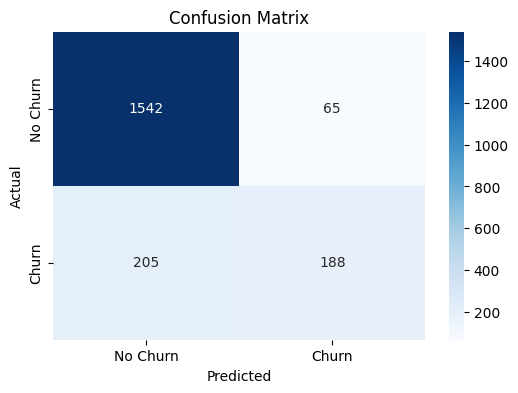

In [23]:
# plotting the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

True Positive - 188,
False Positive - 65,
True Negative - 1542,
False Negative - 205,

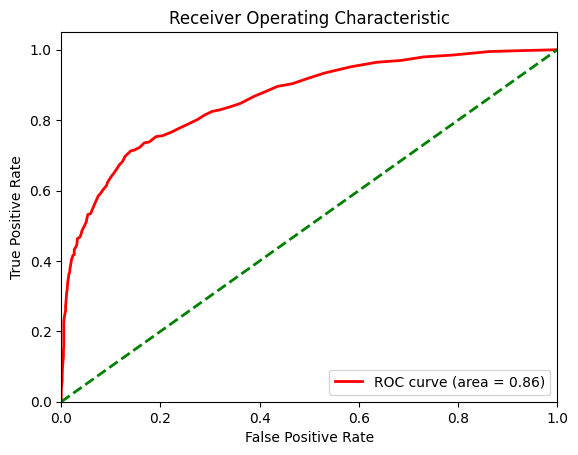

In [24]:
# plotting ROC AUC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='Red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='Green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
# making prediction with new data
# sample 1:
new_data = pd.DataFrame({
    'CreditScore': [502],
    'Geography': [0],  # France
    'Gender': [0],  # Female
    'Age': [42],
    'Tenure': [8],
    'Balance' : [159660.8],
    'NumOfProducts': [3],
    'HasCrCard': [1],
    'IsActiveMember': [0],
    'EstimatedSalary': [113931.57]
})


In [26]:
# prediction using the same scaler
new_data[numerical_features] = scaler.transform(new_data[numerical_features])

# Predict the churn
new_pred = model.predict(new_data)
print(f"Predicted churn: {new_pred}")

Predicted churn: [1]


Churn prediction = 1 implies the person is still the customer of the bank.

In [27]:
# making prediction with new data
# sample 2:
new_data = pd.DataFrame({
    'CreditScore': [684],
    'Geography': [0],  # France
    'Gender': [1],  # Male
    'Age': [27],
    'Tenure': [2],
    'Balance' : [134603.88],
    'NumOfProducts': [1],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [71725.73]
})

In [28]:
# prediction using the same scaler
new_data[numerical_features] = scaler.transform(new_data[numerical_features])

# Predict the churn
new_pred = model.predict(new_data)
print(f"Predicted churn: {new_pred}")

Predicted churn: [0]


Churn prediction = 0 implies the person is not the customer of the bank.

In [29]:
import joblib
joblib.dump(model,"Churn_prediction_model")


['Churn_prediction_model']